# Importing required packages

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
from plotly.offline import init_notebook_mode,iplot
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Data Importing and Pre-processing

In [138]:
# Importing data
data_original_train = pd.read_csv(r"C:\Users\predator\OneDrive\Desktop\feynn lab\Train.csv")
data_original_test = pd.read_csv(r"C:\Users\predator\OneDrive\Desktop\feynn lab\Test.csv")

In [139]:
data_original_train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [140]:
data_original_test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [219]:
Train = data_original_train.copy()

In [220]:
Test = data_original_test.copy()

In [221]:
# Removing duplicate records
Train.drop_duplicates(keep='first',inplace=True)
Train
# No duplicate values

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [222]:
# Removing duplicate records
Test.drop_duplicates(keep='first',inplace=True)
Test
# No duplicate values

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [223]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 756.4+ KB


In [224]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 246.3+ KB


In [225]:
# No. of missing values in each column
Train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [226]:
# No. of missing values in each column
Test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [227]:
Train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [228]:
Train.describe(include=object)

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [229]:
Test.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [230]:
Test.describe(include=object)

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,2627,2577,2603,2589,2627,2595,2627
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,A
freq,1424,1520,1602,802,1616,1672,846


In [231]:
Train.nunique()

ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
dtype: int64

In [232]:
Train.nunique()

ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
dtype: int64

In [233]:
# Dropping unwanted columns
col=['ID']
Train = Train.drop(columns = col, axis = 1)
Test = Test.drop(columns = col, axis = 1) 

In [234]:
Train.shape

(8068, 10)

In [235]:
Test.shape

(2627, 10)

In [236]:
for i in Train.columns.values.tolist():
    if Train[i].dtypes!=object:
        print(i,'=',Train[i].unique())

Age = [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Work_Experience = [ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
Family_Size = [ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]


In [237]:
for i in Train.columns.values.tolist():
    if Train[i].dtypes==object:
        print(i,'=',Train[i].unique())

Gender = ['Male' 'Female']
Ever_Married = ['No' 'Yes' nan]
Graduated = ['No' 'Yes' nan]
Profession = ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Spending_Score = ['Low' 'Average' 'High']
Var_1 = ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
Segmentation = ['D' 'A' 'B' 'C']


In [238]:
for i in Test.columns.values.tolist():
    if Test[i].dtypes!=object:
        print(i,'=',Test[i].unique())

Age = [36 37 69 59 19 47 61 50 22 27 18 20 45 55 88 63 42 79 35 52 29 87 89 31
 72 41 62 56 60 68 57 51 86 74 23 80 78 48 70 83 73 46 43 32 39 71 67 49
 65 33 58 30 21 26 81 28 76 85 66 53 40 25 77 75 82 84 38]
Work_Experience = [ 0.  8. 11. nan  5.  1.  2.  9.  3.  6.  7.  4. 13. 10. 12. 14.]
Family_Size = [ 1.  4.  2.  5.  3.  6. nan  8.  7.  9.]


In [239]:
for i in Test.columns.values.tolist():
    if Test[i].dtypes==object:
        print(i,'=',Test[i].unique())

Gender = ['Female' 'Male']
Ever_Married = ['Yes' 'No' nan]
Graduated = ['Yes' 'No' nan]
Profession = ['Engineer' 'Healthcare' nan 'Executive' 'Marketing' 'Doctor' 'Artist'
 'Lawyer' 'Entertainment' 'Homemaker']
Spending_Score = ['Low' 'Average' 'High']
Var_1 = ['Cat_6' 'Cat_4' 'Cat_3' nan 'Cat_1' 'Cat_2' 'Cat_5' 'Cat_7']
Segmentation = ['B' 'A' 'C' 'D']


All except Gender, Age and Spending_Score have missing values I shall replace missing values in categorical features with each of their modes, and numerical features with each of their median. Median is used instead of mean as it is not affected by outliers or extremes.

In [240]:
Train['Ever_Married'] = Train['Ever_Married'].fillna(Train['Ever_Married'].mode()[0])
Train['Graduated'] = Train['Graduated'].fillna(Train['Graduated'].mode()[0])
Train['Profession'] = Train['Profession'].fillna(Train['Profession'].mode()[0])
Test['Ever_Married'] = Test['Ever_Married'].fillna(Test['Ever_Married'].mode()[0])
Test['Graduated'] = Test['Graduated'].fillna(Test['Graduated'].mode()[0])
Test['Profession'] = Test['Profession'].fillna(Test['Profession'].mode()[0])

In [241]:
Train['Work_Experience'] = Train['Work_Experience'].fillna(Train['Work_Experience'].median())
Train['Family_Size'] = Train['Family_Size'].fillna(Train["Family_Size"].median()) 
Test['Work_Experience'] = Test['Work_Experience'].fillna(Test['Work_Experience'].median())
Test['Family_Size'] = Test['Family_Size'].fillna(Test["Family_Size"].median()) 

In [242]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     8068 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   object 
 4   Profession       8068 non-null   object 
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      8068 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 693.3+ KB


In [243]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   object 
 1   Ever_Married     2627 non-null   object 
 2   Age              2627 non-null   int64  
 3   Graduated        2627 non-null   object 
 4   Profession       2627 non-null   object 
 5   Work_Experience  2627 non-null   float64
 6   Spending_Score   2627 non-null   object 
 7   Family_Size      2627 non-null   float64
 8   Var_1            2595 non-null   object 
 9   Segmentation     2627 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 225.8+ KB


In [244]:
Train = Train.dropna(axis=0)
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7992 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           7992 non-null   object 
 1   Ever_Married     7992 non-null   object 
 2   Age              7992 non-null   int64  
 3   Graduated        7992 non-null   object 
 4   Profession       7992 non-null   object 
 5   Work_Experience  7992 non-null   float64
 6   Spending_Score   7992 non-null   object 
 7   Family_Size      7992 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     7992 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 686.8+ KB


In [245]:
Test = Test.dropna(axis=0)
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2595 non-null   object 
 1   Ever_Married     2595 non-null   object 
 2   Age              2595 non-null   int64  
 3   Graduated        2595 non-null   object 
 4   Profession       2595 non-null   object 
 5   Work_Experience  2595 non-null   float64
 6   Spending_Score   2595 non-null   object 
 7   Family_Size      2595 non-null   float64
 8   Var_1            2595 non-null   object 
 9   Segmentation     2595 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 223.0+ KB


# Data Visualization

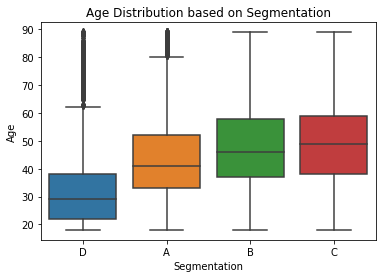

In [168]:
# Age based on Segmentation
sns.boxplot(x='Segmentation', y='Age', data=Train)
plt.title("Age Distribution based on Segmentation")
plt.show()

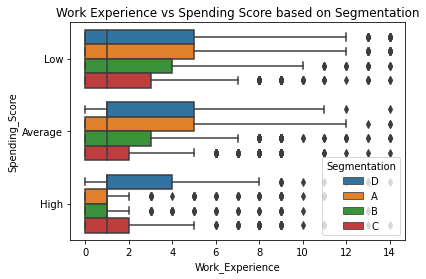

In [169]:
# Work Experience vs Spending Score based on Segmentation
sns.boxplot(x='Work_Experience', y='Spending_Score', hue='Segmentation', data=Train)
plt.title("Work Experience vs Spending Score based on Segmentation")
plt.show()

In [170]:
g1 = [go.Box(y=Train.Work_Experience,name="Work_Experience",marker=dict(color="rgba(51,0,0,0.9)"),hoverinfo="name+y")]
g2 = [go.Box(y=Train.Family_Size,name="Family_Size",marker=dict(color="rgba(0,102,102,0.9)"),hoverinfo="name+y")]
layout2 = go.Layout(title="Work Experience | Family Size",yaxis=dict(range=[0,13])) 
fig2 = go.Figure(data=g1+g2,layout=layout2)
iplot(fig2)

In [171]:
grafico = px.box(Train, y='Age')
grafico.show()

In [172]:
fig2 = px.histogram(Train,x='Age',color='Age',template='plotly_dark')
fig2.show()

In [173]:
fig2 = px.histogram(Train,x='Gender',color='Gender',template='plotly_dark')
fig2.show()

In [174]:
fig2 = px.histogram(Train,x='Ever_Married',color='Ever_Married',template='plotly_dark')
fig2.show()

In [175]:
fig2 = px.histogram(Train,x='Graduated',color='Graduated',template='plotly_dark')
fig2.show()

In [176]:
fig2 = px.histogram(Train,x='Profession',color='Profession',template='plotly_dark')
fig2.show()

In [177]:
fig2 = px.histogram(Train,x='Work_Experience',color='Work_Experience',template='plotly_dark')
fig2.show()

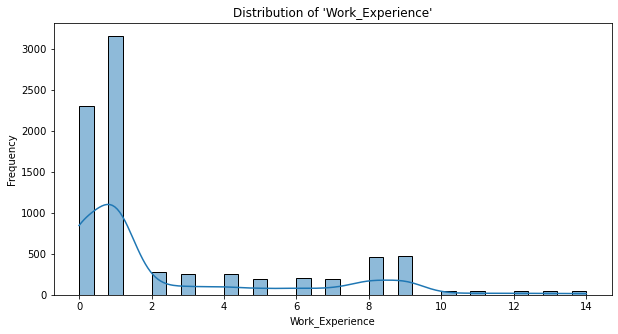

In [178]:
# Plot the distribution of 'Work_Experience'
plt.figure(figsize=(10,5))
sns.histplot(Train['Work_Experience'], kde=True)
plt.title("Distribution of 'Work_Experience'")
plt.xlabel("Work_Experience")
plt.ylabel("Frequency")
plt.show()

In [179]:
fig2 = px.histogram(Train,x='Spending_Score',color='Spending_Score',template='plotly_dark')
fig2.show()

In [180]:
fig2 = px.histogram(Train,x='Family_Size',color='Family_Size',template='plotly_dark')
fig2.show()

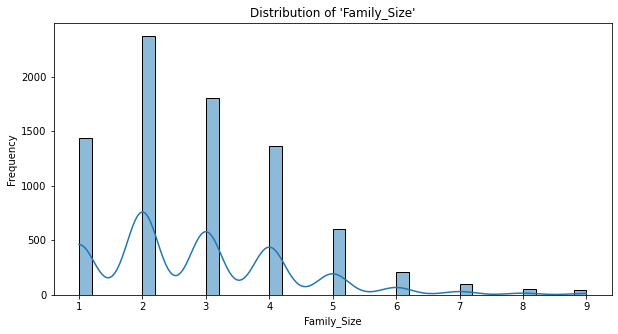

In [181]:
# Plot the distribution of 'Family_Size'
plt.figure(figsize=(10,5))
sns.histplot(Train['Family_Size'], kde=True)
plt.title("Distribution of 'Family_Size'")
plt.xlabel("Family_Size")
plt.ylabel("Frequency")
plt.show()

In [182]:
# Family Size based on Segmentation
plot_data = Train.groupby('Family_Size')['Family_Size'].agg(['count']).reset_index()

fig = px.pie(plot_data, values = plot_data['count'], names = plot_data['Family_Size'])

fig.update_traces(textposition = 'inside', textinfo = 'percent + label', hole = 0.5, 
                  marker = dict(colors = ['#2A3132','#336B87'], line = dict(color = 'white', width = 2)))

fig.update_layout(title_text = 'Customer<br>Family_Size', title_x = 0.5, title_y = 0.55, title_font_size = 26, 
                  title_font_family = 'Calibri', title_font_color = 'black', showlegend = False)
                  
fig.show()

In [183]:
fig2 = px.histogram(Train,x='Var_1',color='Var_1',template='plotly_dark')
fig2.show()

In [184]:
plot_data = Train.groupby('Var_1')['Var_1'].agg(['count']).reset_index()

fig = px.pie(plot_data, values = plot_data['count'], names = plot_data['Var_1'])

fig.update_traces(textposition = 'inside', textinfo = 'percent + label', hole = 0.5, 
                  marker = dict(colors = ['#2A3132','#336B87'], line = dict(color = 'white', width = 2)))

fig.update_layout(title_text = 'Customer<br>Var_1', title_x = 0.5, title_y = 0.55, title_font_size = 26, 
                  title_font_family = 'Calibri', title_font_color = 'black', showlegend = False)
                  
fig.show()

In [185]:
plot_data = Train.groupby('Segmentation')['Segmentation'].agg(['count']).reset_index()

fig = px.pie(plot_data, values = plot_data['count'], names = plot_data['Segmentation'])

fig.update_traces(textposition = 'inside', textinfo = 'percent + label', hole = 0.5, 
                  marker = dict(colors = ['#2A3132','#336B87'], line = dict(color = 'white', width = 2)))

fig.update_layout(title_text = 'Customer<br>Segmentation', title_x = 0.5, title_y = 0.55, title_font_size = 26, 
                  title_font_family = 'Calibri', title_font_color = 'black', showlegend = False)
                  
fig.show()

In [186]:
fig2 = px.histogram(Train,x='Segmentation',color='Segmentation',template='plotly_dark')
fig2.show()

In [187]:
def plot_pie(feature):
    plot_data = Train.groupby([feature, 'Segmentation'])[feature].agg({'count'}).reset_index()

    fig = px.sunburst(plot_data, path = [feature, 'Segmentation'], values = 'count', color = feature, 
                      title = 'Affect of %s on Customer Segmentation'%feature, width = 600, height = 600)

    fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', title_font_color = '#221f1f', 
                      title_font_size = 22, title_x = 0.5)

    fig.update_traces(textinfo = 'label + percent parent')
    fig.show()

In [188]:
for feature in ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score']:
    plot_pie(feature)

C:\Users\predator\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\predator\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\predator\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\predator\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\predator\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\predator\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\predator\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\predator\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [189]:
for feature in ['Profession', 'Var_1']:
    plot_pie(feature)

C:\Users\predator\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\predator\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\predator\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\predator\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [190]:
def plot_numerical(feature, figsize=None):
    fig = plt.figure(figsize=(10,6))

    sns.kdeplot(Train[Train['Segmentation']=='A'][feature])
    sns.kdeplot(Train[Train['Segmentation']=='B'][feature])
    sns.kdeplot(Train[Train['Segmentation']=='C'][feature])
    sns.kdeplot(Train[Train['Segmentation']=='D'][feature])

    fig.legend(labels=['Segmentation A', 'Segmentation B', 'Segmentation C', 'Segmentation D'])
    plt.title('Based on %s'%feature)
    plt.show()

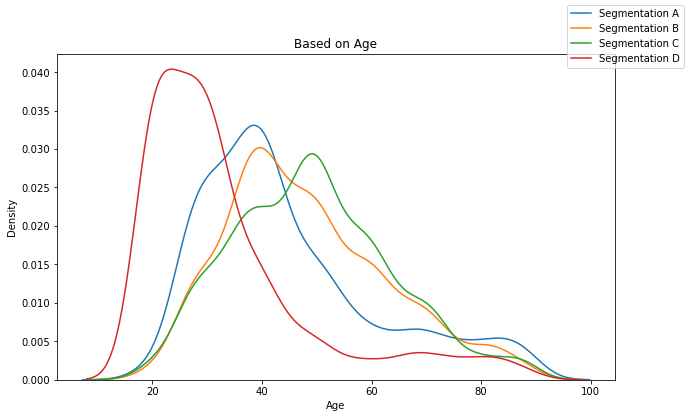

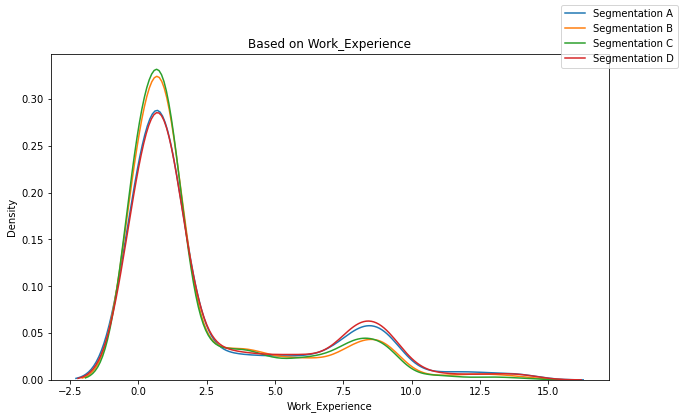

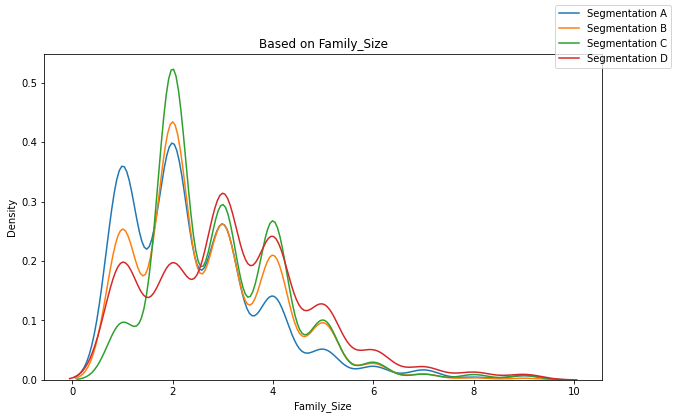

In [191]:
for feature in ['Age', 'Work_Experience', 'Family_Size']:
    plot_numerical(feature)

Observations-

- Ever_Married - UnMarried customers are usually in segment D while married are in segment A, B or C.
- Graduated - Graduated customers are usually in segment A, B or C while Ungraduated are in segment D.
- Profession - Customers in healthcare & marketing are mostly in segment D, Artist & engineers are usually in A, B or C.
- Spending_Score - Usually 'Low' spenders are in segment A or D while 'high' and 'average' spenders are in segment B or C.
- Spending score gets higher starting from the age 35.
- Age - <30 are in segment D, 30-40 or >70 are in segment A while 45-70 are in segment C.
- Work_Experience - <2 are in segment C while 6-11 are in segment A & D.
- Family_Size - <1 are in segment A, 1-3 are in Segment C and 4+ in segment D.
- The higher the family size gets, the lower of segmentations they get.
- Gender has no significant importance over most of the dataset features.
- Married individuals with no kids are most likely to get sementation types A & D.
- Cat_6 has a percentage of 60% above every other type, then comes Cat_3 & Cat_4 of nearly 10% of percentage.

# Correlation Analysis

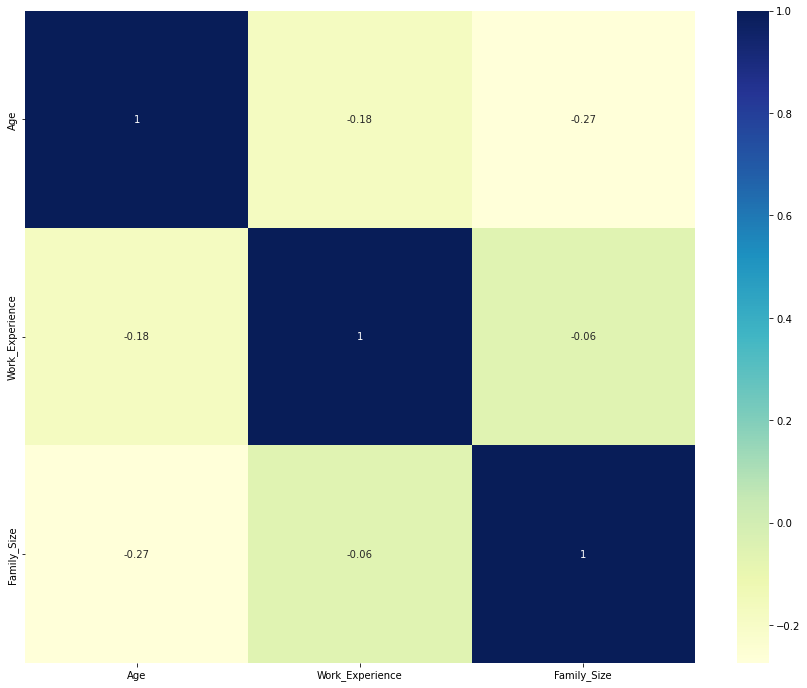

In [192]:
plt.figure(figsize=(15,12))
sns.heatmap(Train.corr(), annot=True, cmap='YlGnBu');

Converting Categorical Variables to Numeric:

In [246]:
mk = LabelEncoder()
Train['Gender'] = mk.fit_transform(Train['Gender'])
Train['Ever_Married'] = mk.fit_transform(Train['Ever_Married'])
Train['Graduated'] = mk.fit_transform(Train['Graduated'])
Train['Spending_Score'] = mk.fit_transform(Train['Spending_Score'])
Train['Var_1'] = mk.fit_transform(Train['Var_1'])
Train['Profession'] = mk.fit_transform(Train['Profession'])
Train['Family_Size'] = mk.fit_transform(Train['Family_Size'])
Train['Work_Experience'] = mk.fit_transform(Train['Work_Experience'])
Train['Segmentation'] = mk.fit_transform(Train['Segmentation'])

In [247]:
mk = LabelEncoder()
Test['Gender'] = mk.fit_transform(Test['Gender'])
Test['Ever_Married'] = mk.fit_transform(Test['Ever_Married'])
Test['Graduated'] = mk.fit_transform(Test['Graduated'])
Test['Spending_Score'] = mk.fit_transform(Test['Spending_Score'])
Test['Var_1'] = mk.fit_transform(Test['Var_1'])
Test['Profession'] = mk.fit_transform(Test['Profession'])
Test['Family_Size'] = mk.fit_transform(Test['Family_Size'])
Test['Work_Experience'] = mk.fit_transform(Test['Work_Experience'])
Test['Segmentation'] = mk.fit_transform(Test['Segmentation'])

In [248]:
Train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1,2,3,3,3
1,0,1,38,1,2,1,0,2,3,0
2,0,1,67,1,2,1,2,0,5,1
3,1,1,67,1,7,0,1,1,5,1
4,0,1,40,1,3,1,1,5,5,0
...,...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,0,0,2,6,0,3
8064,1,0,35,0,4,3,2,3,3,3
8065,0,0,33,1,5,1,2,0,5,3
8066,0,0,27,1,5,1,2,3,5,1


In [249]:
Test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,36,1,2,0,2,0,5,1
1,1,1,37,1,5,8,0,3,5,0
2,0,1,69,0,0,0,2,0,5,0
3,1,1,59,0,4,11,1,1,5,1
4,0,0,19,0,8,1,2,3,5,0
...,...,...,...,...,...,...,...,...,...,...
2622,1,0,29,0,5,9,2,3,5,1
2623,0,0,35,1,1,1,2,0,5,0
2624,0,0,53,1,3,1,2,1,5,2
2625,1,1,47,1,4,1,1,4,3,2


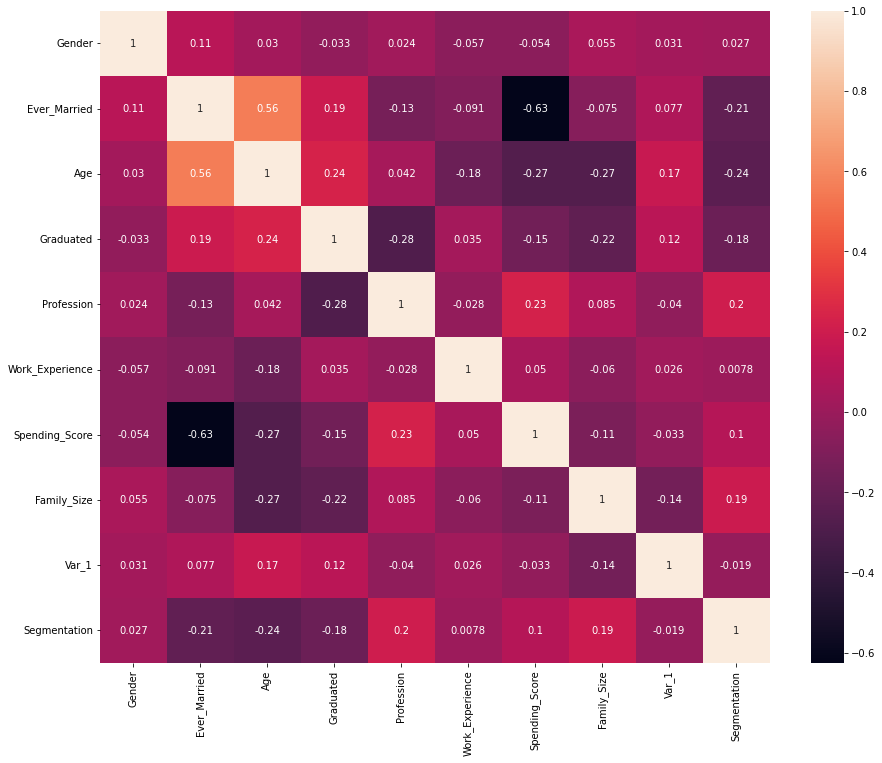

In [195]:
plt.figure(figsize=(15,12))
sns.heatmap(Train.corr(), annot=True);

In [196]:
X = Train.drop('Segmentation', axis = 1)
y = Train['Segmentation']

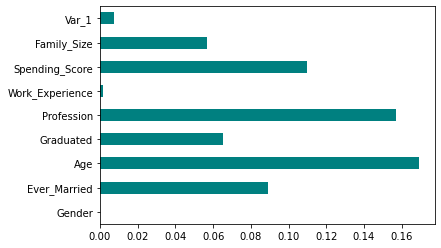

In [197]:
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, Train.columns[0:len(Train.columns)-1])
feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()

In [215]:
#std  = MinMaxScaler()
#X = pd.DataFrame(std.fit_transform(X) , columns=X.columns)
#X
# No need to scale bcoz it gives same accuracy

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1.0,0.0,0.056338,0.0,0.625,0.071429,1.0,0.375,0.500000
1,0.0,1.0,0.281690,1.0,0.250,0.071429,0.0,0.250,0.500000
2,0.0,1.0,0.690141,1.0,0.250,0.071429,1.0,0.000,0.833333
3,1.0,1.0,0.690141,1.0,0.875,0.000000,0.5,0.125,0.833333
4,0.0,1.0,0.309859,1.0,0.375,0.071429,0.5,0.625,0.833333
...,...,...,...,...,...,...,...,...,...
7987,1.0,0.0,0.056338,0.0,0.000,0.000000,1.0,0.750,0.000000
7988,1.0,0.0,0.239437,0.0,0.500,0.214286,1.0,0.375,0.500000
7989,0.0,0.0,0.211268,1.0,0.625,0.071429,1.0,0.000,0.833333
7990,0.0,0.0,0.126761,1.0,0.625,0.071429,1.0,0.375,0.833333


Split train test data

In [250]:
from sklearn.model_selection import train_test_split

features = Train.drop(columns=['Segmentation'],axis=1)
target = Train['Segmentation']
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=0)
# If we split train data for train and test both

In [253]:
X_train_gv = Train.drop(columns=['Segmentation'],axis=1)
y_train_gv = Train['Segmentation']
X_test_gv = Test.drop(columns=['Segmentation'],axis=1)
y_test_gv = Test['Segmentation']
# If we split train and test data accordingly as given

# Building Model

In [203]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [295]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'Naive_Bayes': naive_bayes.MultinomialNB(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'XGBClassifier': XGBClassifier()}

In [296]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(0)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores,index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
    
    
    return model_scores

In [297]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
cm = sns.color_palette('PuBuGn',as_cmap=True)
score = model_scores.style.background_gradient(cmap=cm)
score

,Score
DecisionTreeClassifier,0.425891
Naive_Bayes,0.464040
KNeighborsClassifier,0.470294
SVC,0.484053
RandomForestClassifier,0.485303
LogisticRegression,0.505316
XGBClassifier,0.525328
AdaBoostClassifier,0.527830
GradientBoostingClassifier,0.541588


In [298]:
model_scores = fit_and_score(models,X_train_gv,X_test_gv,y_train_gv,y_test_gv)
cm = sns.color_palette('PuBuGn',as_cmap=True)
score = model_scores.style.background_gradient(cmap=cm)
score

,Score
DecisionTreeClassifier,0.314451
Naive_Bayes,0.318690
XGBClassifier,0.319846
RandomForestClassifier,0.321773
AdaBoostClassifier,0.327938
LogisticRegression,0.329865
GradientBoostingClassifier,0.332177
KNeighborsClassifier,0.332948
SVC,0.356069


# Logistic Regression

In [270]:
LRclassifier = LogisticRegression(max_iter=10000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)

print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.42      0.45      0.43       385
           1       0.34      0.18      0.23       363
           2       0.50      0.59      0.54       407
           3       0.63      0.75      0.69       444

    accuracy                           0.51      1599
   macro avg       0.47      0.49      0.47      1599
weighted avg       0.48      0.51      0.49      1599

[[172  50  74  89]
 [114  64 140  45]
 [ 59  50 241  57]
 [ 64  26  23 331]]
LR accuracy: 50.53%


# K-NN

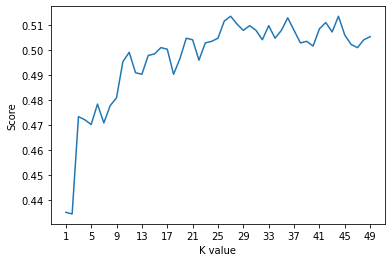

              precision    recall  f1-score   support

           0       0.45      0.48      0.46       385
           1       0.43      0.37      0.40       363
           2       0.61      0.57      0.59       407
           3       0.64      0.71      0.67       444

    accuracy                           0.54      1599
   macro avg       0.53      0.53      0.53      1599
weighted avg       0.54      0.54      0.54      1599

[[184  78  39  84]
 [ 90 136  94  43]
 [ 43  82 230  52]
 [ 93  23  12 316]]
KNN best accuracy: 51.34%


In [288]:
scoreListknn = []
for i in range(1,50):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,50), scoreListknn)
plt.xticks(np.arange(1,50,4))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

# SVC

In [269]:
SVCclassifier = SVC()
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.38      0.49      0.43       385
           1       0.33      0.18      0.23       363
           2       0.50      0.54      0.52       407
           3       0.64      0.68      0.66       444

    accuracy                           0.48      1599
   macro avg       0.46      0.47      0.46      1599
weighted avg       0.47      0.48      0.47      1599

[[190  62  59  74]
 [118  66 136  43]
 [ 88  49 218  52]
 [100  22  22 300]]
SVC accuracy: 48.41%


# Naive Bayes

In [299]:
NBC = naive_bayes.MultinomialNB()
NBC.fit(X_train, y_train)

y_pred = NBC.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBCAcc = accuracy_score(y_pred,y_test)
print('NB accuracy: {:.2f}%'.format(NBCAcc*100))

              precision    recall  f1-score   support

           0       0.36      0.28      0.32       385
           1       0.32      0.21      0.26       363
           2       0.45      0.58      0.51       407
           3       0.60      0.71      0.65       444

    accuracy                           0.46      1599
   macro avg       0.43      0.45      0.43      1599
weighted avg       0.44      0.46      0.45      1599

[[109  89  97  90]
 [ 75  78 156  54]
 [ 59  46 238  64]
 [ 63  30  34 317]]
NB accuracy: 46.40%


# Decision Tree

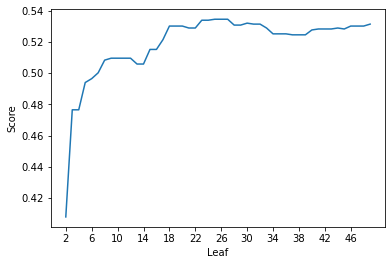

              precision    recall  f1-score   support

           0       0.45      0.48      0.46       385
           1       0.43      0.37      0.40       363
           2       0.61      0.57      0.59       407
           3       0.64      0.71      0.67       444

    accuracy                           0.54      1599
   macro avg       0.53      0.53      0.53      1599
weighted avg       0.54      0.54      0.54      1599

[[184  78  39  84]
 [ 90 136  94  43]
 [ 43  82 230  52]
 [ 93  23  12 316]]
Decision Tree Accuracy: 53.47%


In [289]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,4))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

# Random Forest

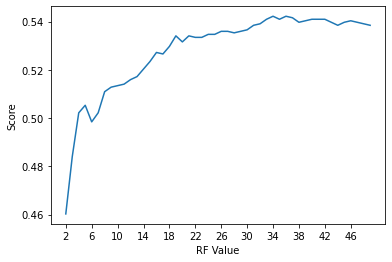

              precision    recall  f1-score   support

           0       0.45      0.48      0.46       385
           1       0.43      0.37      0.40       363
           2       0.61      0.57      0.59       407
           3       0.64      0.71      0.67       444

    accuracy                           0.54      1599
   macro avg       0.53      0.53      0.53      1599
weighted avg       0.54      0.54      0.54      1599

[[184  78  39  84]
 [ 90 136  94  43]
 [ 43  82 230  52]
 [ 93  23  12 316]]
Random Forest Accuracy:  54.22%


In [290]:
scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,4))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

# XG Boost

In [285]:
XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)

y_pred = XGBC.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
XGBAcc = accuracy_score(y_pred,y_test)
print('XGB accuracy: {:.2f}%'.format(XGBAcc*100))

              precision    recall  f1-score   support

           0       0.43      0.47      0.45       385
           1       0.40      0.34      0.37       363
           2       0.58      0.57      0.57       407
           3       0.65      0.68      0.67       444

    accuracy                           0.53      1599
   macro avg       0.51      0.52      0.51      1599
weighted avg       0.52      0.53      0.52      1599

[[180  82  46  77]
 [ 98 125 100  40]
 [ 52  75 231  49]
 [ 91  29  20 304]]
XGB accuracy: 52.53%


# Ada Boost

In [286]:
ABC = AdaBoostClassifier()
ABC.fit(X_train, y_train)

y_pred = ABC.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
ABCAcc = accuracy_score(y_pred,y_test)
print('AB accuracy: {:.2f}%'.format(ABCAcc*100))

              precision    recall  f1-score   support

           0       0.44      0.49      0.46       385
           1       0.40      0.29      0.33       363
           2       0.56      0.59      0.57       407
           3       0.64      0.70      0.67       444

    accuracy                           0.53      1599
   macro avg       0.51      0.52      0.51      1599
weighted avg       0.52      0.53      0.52      1599

[[188  68  52  77]
 [107 104 111  41]
 [ 48  65 240  54]
 [ 82  22  28 312]]
AB accuracy: 52.78%


# Gradiant Boosting

In [287]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)

y_pred = GBC.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBCAcc = accuracy_score(y_pred,y_test)
print('GB accuracy: {:.2f}%'.format(GBCAcc*100))

              precision    recall  f1-score   support

           0       0.45      0.48      0.46       385
           1       0.43      0.37      0.40       363
           2       0.61      0.57      0.59       407
           3       0.64      0.71      0.67       444

    accuracy                           0.54      1599
   macro avg       0.53      0.53      0.53      1599
weighted avg       0.54      0.54      0.54      1599

[[184  78  39  84]
 [ 90 136  94  43]
 [ 43  82 230  52]
 [ 93  23  12 316]]
GB accuracy: 54.16%


# Final Model Comparision

In [302]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Naive_Bayes', 'Decision Tree', 
                                  'Random Forest', 'Xg Boost', 'Ada Boost', 'Gradiant Boosting'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                      NBCAcc*100, DTAcc*100, 
                                     RFAcc*100, XGBAcc*100, ABCAcc*100, GBCAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Random Forest,54.221388
8,Gradiant Boosting,54.158849
4,Decision Tree,53.470919
7,Ada Boost,52.782989
6,Xg Boost,52.532833
1,K Neighbors,51.344590
0,Logistic Regression,50.531582
2,SVM,48.405253
3,Naive_Bayes,46.404003


# Conclusion

- For Training Data,  Random Forest gives the maximum accuracy. And for Testing Data, SVM gives the maximum accuracy.
- Here the most important feature is Age followed by Profession for Train dataset.